### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import gsw
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
glodapdir = '/gpfs/data/greenocean/observations/GLODAPv2.2016b_MappedClimatologies/'

tco2f = 'GLODAPv2.2016b.TCO2.nc'
talkf = 'GLODAPv2.2016b.TAlk.nc'
cantf = 'GLODAPv2.2016b.Cant.nc'
saltf = 'GLODAPv2.2016b.salinity.nc'
tempf = 'GLODAPv2.2016b.temperature.nc'

tco2 = xr.open_dataset(f'{glodapdir}{tco2f}')
cant = xr.open_dataset(f'{glodapdir}{cantf}')
salt = xr.open_dataset(f'{glodapdir}{saltf}')
temp = xr.open_dataset(f'{glodapdir}{tempf}')
talk = xr.open_dataset(f'{glodapdir}{talkf}')




# get 3d array of rho

# get 3d array of tco2 umol/L

# get 3d array of cant umol/L

# get alphas

## get ts of cant 1700-2100

## get ts of dic estimate 1700-2100


#consT = gsw.CT_from_t(absS,insituT,pres)

In [5]:
talk

<xarray.Dataset>
Dimensions:      (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon          (lon) float64 20.5 21.5 22.5 23.5 ... 376.5 377.5 378.5 379.5
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    TAlk         (depth_surface, lat, lon) float64 ...
    TAlk_error   (depth_surface, lat, lon) float64 ...
    Input_mean   (depth_surface, lat, lon) float64 ...
    Input_std    (depth_surface, lat, lon) float64 ...
    Input_N      (depth_surface, lat, lon) float64 ...
    TAlk_relerr  (depth_surface, lat, lon) float64 ...
    SnR          (snr) float64 ...
    CL           (snr) float64 ...
    Depth        (depth_surface) float64 ...
Attributes:
    Description:          1 X 1 global mapped field of total alkalinity from ...
    Created:              Created by Siv K. Lauvset on 12-May-2016 18:39:49
    Institution name:     University of Bergen
    Contact information:  siv.lauvset@uib.no; are.olsen@uib.no
    Citation:             Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Ar...
    Comment:              Ttza2hhod0eend0s ai2eLlt  a iufucosivonilsr,neer gs...

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


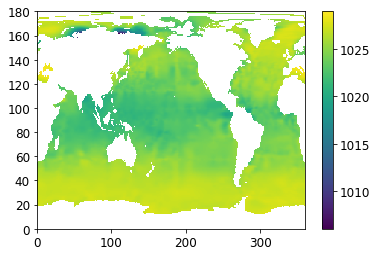

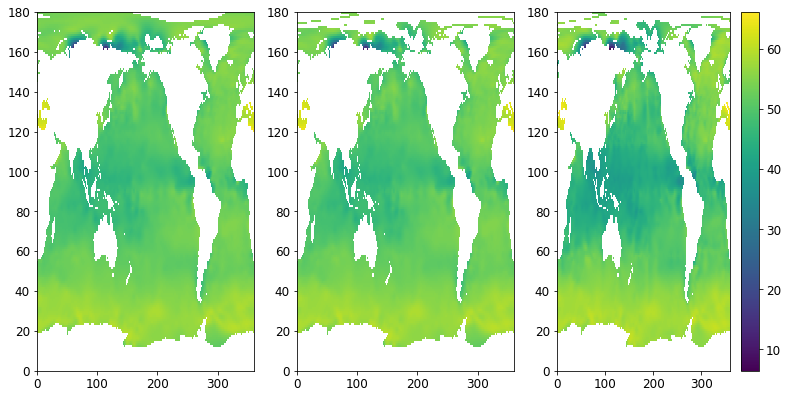

In [6]:
# get abs sal
# SR = SP (35.16504/35.000) g kg–1 where SP is psu, sr is reference salinity
salt['SR'] = salt.salinity*35.16504/35.000
salt

# get 3d array of depths
tdepth = cant.Depth.values
depths = np.zeros([33,180,360])
for i in range(0,33):
    depths[i,:,:] = tdepth[i]

# get CT
consT = gsw.CT_from_t(salt.SR,temp.temperature,depths)

# get 3d array of rho
rho = gsw.rho(salt.SR,consT,depths)
q = plt.pcolormesh(rho[0,:,:])
plt.colorbar(q)

# get 3d array of tco2 and cant in umol/L
tco2_umolL = tco2.TCO2 * rho/1000
talk_umolL = talk.TAlk * rho/1000
cant_umolL = cant.Cant * rho/1000
#print(np.nanmax(cant_umolL-cant.Cant))
# get 3d array of depths

fact = 1.1
fig, axs = plt.subplots(1,3, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].pcolormesh(tco2.TCO2[0,:,:])
axs[1].pcolormesh(tco2_umolL[0,:,:])
v = axs[2].pcolormesh(tco2_umolL[0,:,:]-tco2.TCO2[0,:,:])
plt.colorbar(v, ax = axs[2])

atm co2 (uatm) at 2090 ssp1: 456.92
atm co2 (uatm) at 2090 ssp3: 787.49


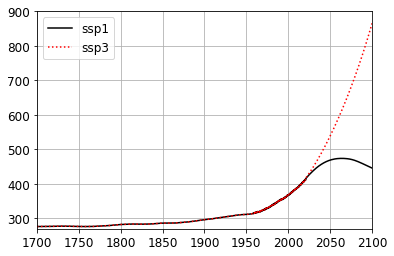

In [7]:
co2_ssp1 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp1-26.dat'
co2_ssp3 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp3-70.dat'

atmo_co2_ssp1 = pd.read_csv(co2_ssp1, sep='\t')
atmo_co2_ssp3 = pd.read_csv(co2_ssp3, sep='\t')



yr = atmo_co2_ssp1['1650.042'].values
co2atm_ssp1 = atmo_co2_ssp1['276.58'].values
co2atm_ssp3 = atmo_co2_ssp3['276.58'].values


yrmns = np.arange(1700,2100,1)
yrmn_co2_ssp1 = np.arange(1700,2100,1)
yrmn_co2_ssp1 = yrmn_co2_ssp1.astype('float')
yrmn_co2_ssp3 = np.arange(1700,2100,1)
yrmn_co2_ssp3 = yrmn_co2_ssp3.astype('float')


for i in range(1700,2100):
    yrmn_co2_ssp1[i-1700] = np.nanmean(co2atm_ssp1[(yr >= i) & (yr< i+1)])
    yrmn_co2_ssp3[i-1700] = np.nanmean(co2atm_ssp3[(yr >= i) & (yr< i+1)])

    # print(yrmn_co2[i-1700])
    
plt.figure()
plt.plot(yr,co2atm_ssp1, 'k-', label = 'ssp1')
plt.plot(yr,co2atm_ssp3, 'r:', label = 'ssp3')

#plt.plot(yrmns,yrmn_co2, 'r.', label = 'yearly means')
plt.legend()
plt.xlim([1700,2100])
plt.ylim([270,900])
plt.grid()
# plt.title('atmo co2, ppm, from GCB 2023 reference files')
ty = 2090
print(f'atm co2 (uatm) at 2090 ssp1: {yrmn_co2_ssp1[yrmns == ty][0]}')
print(f'atm co2 (uatm) at 2090 ssp3: {yrmn_co2_ssp3[yrmns == ty][0]}')


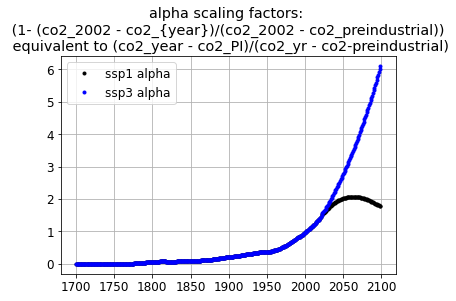

In [21]:
#alpha = np.arange(1700,2100,1).astype('float')
alpha2_ssp1 = np.arange(1700,2100,1).astype('float')

# for i in range(1700,2100):
#     #alpha[i-1700] =  (1-(yrmn_co2[yrmns == 2002]-yrmn_co2[yrmns == i])/yrmn_co2[yrmns == 2002])
#     alpha2_ssp1[i-1700] =  (1-(yrmn_co2_ssp1[yrmns == 2002]-\
#                                yrmn_co2_ssp1[yrmns == i])/\
#                             (yrmn_co2_ssp1[yrmns == 2002]-276.5941666666667))
# alpha2_ssp3 = np.arange(1700,2100,1).astype('float')

# for i in range(1700,2100):
#     #alpha[i-1700] =  (1-(yrmn_co2[yrmns == 2002]-yrmn_co2[yrmns == i])/yrmn_co2[yrmns == 2002])
#     alpha2_ssp3[i-1700] =  (1-(yrmn_co2_ssp3[yrmns == 2002]-\
#                                yrmn_co2_ssp3[yrmns == i])/\
#                             (yrmn_co2_ssp3[yrmns == 2002]-276.5941666666667))    

    
for i in range(1700,2100):
    #alpha[i-1700] =  (1-(yrmn_co2[yrmns == 2002]-yrmn_co2[yrmns == i])/yrmn_co2[yrmns == 2002])
    alpha2_ssp1[i-1700] =     (yrmn_co2_ssp1[yrmns == i] - 276.5941666666667)/\
                            (yrmn_co2_ssp1[yrmns == 2002]-276.5941666666667)
alpha2_ssp3 = np.arange(1700,2100,1).astype('float')

for i in range(1700,2100):
    #alpha[i-1700] =  (1-(yrmn_co2[yrmns == 2002]-yrmn_co2[yrmns == i])/yrmn_co2[yrmns == 2002])
    alpha2_ssp3[i-1700] =  (yrmn_co2_ssp3[yrmns == i] - 276.5941666666667)/\
                            (yrmn_co2_ssp3[yrmns == 2002]-276.5941666666667)
    
    
plt.figure()
#plt.plot(yrmns,alpha, 'r.', label = 'yearly means')
plt.plot(yrmns,alpha2_ssp1, 'k.', label = 'ssp1 alpha')

plt.plot(yrmns,alpha2_ssp3, 'b.', label = 'ssp3 alpha')
plt.grid()
plt.legend()
q = plt.title('alpha scaling factors: \n (1- (co2_2002 - co2_{year})/(co2_2002 - co2_preindustrial)) \n equivalent to (co2_year - co2_PI)/(co2_yr - co2-preindustrial)')

In [9]:
cant_umolL

<xarray.DataArray (depth_surface: 33, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 20.5 21.5 22.5 23.5 24.5 ... 376.5 377.5 378.5 379.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: depth_surface

In [10]:
horse = False
if horse:

    refyrs = np.arange(1950,2100,1).astype('float')
    long = cant['lon'].values
    lat = cant['lat'].values
    dep = cant['Depth'].values

    for i in range(0,len(refyrs)):
        ty = int(refyrs[i])
        talpha = alpha2_ssp1[i+(1950-1700)]
        Anth_DIC = np.zeros([33,180,360])
        Anth_DIC= talpha * cant_umolL.values
        Anth_DIC[cant.Cant.values == 0] = np.nan
        print(f'{ty}, alpha = {talpha}, maxdic = {np.nanmax(Anth_DIC)}')
        # print(talpha)
        # print(np.nanmax(Anth_DIC))
        data_vars = {'Anth_DIC':(['depth', 'lat', 'lon'], Anth_DIC,
                                 {'units': 'µmol/L',
                                  'long_name':'anthropogenic DIC'})           
                    }

        # define coordinates
        coords = {'depth': (['depth'], dep),\
                 'lat': (['lat'], lat),\
                 'lon': (['lon'], long)}

        # define global attributes
        attrs = {'made in':'SOZONE/Tuning/glodap_umolL_restart.ipynb',
                }   

        ds = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        fn = f'./GLODAP_AnthDIC/AnthDIC_ssp1_{ty}_umolL.nc'
        ds.to_netcdf(fn)
        
if horse:

    refyrs = np.arange(1950,2100,1).astype('float')
    long = cant['lon'].values
    lat = cant['lat'].values
    dep = cant['Depth'].values

    for i in range(0,len(refyrs)):
        ty = int(refyrs[i])
        talpha = alpha2_ssp3[i+(1950-1700)]
        Anth_DIC = np.zeros([33,180,360])
        Anth_DIC= talpha * cant_umolL.values
        Anth_DIC[cant.Cant.values == 0] = np.nan
        print(f'{ty}, alpha = {talpha}, maxdic = {np.nanmax(Anth_DIC)}')
        # print(talpha)
        # print(np.nanmax(Anth_DIC))
        data_vars = {'Anth_DIC':(['depth', 'lat', 'lon'], Anth_DIC,
                                 {'units': 'µmol/L',
                                  'long_name':'anthropogenic DIC'})           
                    }

        # define coordinates
        coords = {'depth': (['depth'], dep),\
                 'lat': (['lat'], lat),\
                 'lon': (['lon'], long)}

        # define global attributes
        attrs = {'made in':'SOZONE/Tuning/glodap_umolL_restart.ipynb',
                }   

        ds = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        fn = f'./GLODAP_AnthDIC/AnthDIC_ssp3_{ty}_umolL.nc'
        ds.to_netcdf(fn)

In [11]:
horse = True

if horse:
    ### get preindustrial tmap = tco2.TCO2
    AnthDIC_2002 = xr.open_dataset('./GLODAP_AnthDIC/AnthDIC_ssp1_2002_umolL.nc')
    A2002vals = AnthDIC_2002['Anth_DIC'].values
    A2002vals[A2002vals == 0] = np.nan
    DIC_fg = tco2_umolL.values
    DIC_PI = np.zeros_like(DIC_fg)
    DIC_fg[DIC_fg == 0] = np.nan
    DIC_PI = DIC_fg - A2002vals

    long = cant['lon'].values
    lat = cant['lat'].values
    dep = cant['Depth'].values


    data_vars = {'Reconstructed_DIC':(['depth', 'lat', 'lon'], DIC_PI,
                             {'units': 'µmol/L',
                              'long_name':'reconstructed DIC'})           
                }

    # define coordinates
    coords = {
             'depth': (['depth'], dep),\
             'lat': (['lat'], lat),\
             'lon': (['lon'], long)}

    # define global attributes
    attrs = {'made in':'Tuning/glodapBasedRestart.ipynb',
            }   

    ds = xr.Dataset(data_vars=data_vars,
                    coords=coords,
                    attrs=attrs)

    fn = f'./GLODAP_AnthDIC/EstimatedDIC_PI_1700_umolL.nc'
    ds.to_netcdf(fn)

In [12]:
horse = True

if horse:
    ### get preindustrial tmap = tco2.TCO2
#     AnthDIC_2002 = xr.open_dataset('./GLODAP_AnthDIC/AnthDIC_ssp1_2002_umolL.nc')
#     A2002vals = AnthDIC_2002['Anth_DIC'].values
#     A2002vals[A2002vals == 0] = np.nan
#     DIC_fg = tco2_umolL.values
#     DIC_PI = np.zeros_like(DIC_fg)
#     DIC_fg[DIC_fg == 0] = np.nan
    DIC_PI = talk_umolL.values

    long = cant['lon'].values
    lat = cant['lat'].values
    dep = cant['Depth'].values


    data_vars = {'Reconstructed_DIC':(['depth', 'lat', 'lon'], DIC_PI,
                             {'units': 'µmol/L',
                              'long_name':'reconstructed Talk in umol/L'})           
                }

    # define coordinates
    coords = {
             'depth': (['depth'], dep),\
             'lat': (['lat'], lat),\
             'lon': (['lon'], long)}

    # define global attributes
    attrs = {'made in':'Tuning/glodapBasedRestart.ipynb',
            }   

    ds = xr.Dataset(data_vars=data_vars,
                    coords=coords,
                    attrs=attrs)

    fn = f'./GLODAP_AnthDIC/TAlk_umolL.nc'
    ds.to_netcdf(fn)

In [ ]:
horse = True

if horse:
    ### get preindustrial tmap = tco2.TCO2
#     AnthDIC_2002 = xr.open_dataset('./GLODAP_AnthDIC/AnthDIC_ssp1_2002_umolL.nc')
#     A2002vals = AnthDIC_2002['Anth_DIC'].values
#     A2002vals[A2002vals == 0] = np.nan
#     DIC_fg = tco2_umolL.values
#     DIC_PI = np.zeros_like(DIC_fg)
#     DIC_fg[DIC_fg == 0] = np.nan
    DIC_PI = talk_umolL.values

    long = cant['lon'].values
    lat = cant['lat'].values
    dep = cant['Depth'].values


    data_vars = {'Reconstructed_DIC':(['depth', 'lat', 'lon'], DIC_PI,
                             {'units': 'µmol/L',
                              'long_name':'reconstructed Talk in umol/L'})           
                }

    # define coordinates
    coords = {
             'depth': (['depth'], dep),\
             'lat': (['lat'], lat),\
             'lon': (['lon'], long)}

    # define global attributes
    attrs = {'made in':'Tuning/glodapBasedRestart.ipynb',
            }   

    ds = xr.Dataset(data_vars=data_vars,
                    coords=coords,
                    attrs=attrs)

    fn = f'./GLODAP_AnthDIC/cant_umolL.nc'
    ds.to_netcdf(fn)

In [13]:
horse = False
if horse:
    PI_DIC = xr.open_dataset('./GLODAP_AnthDIC/EstimatedDIC_PI_1700_umolL.nc')
    PI_DICvals = PI_DIC['Reconstructed_DIC'].values
    
    #refyrs = np.arange(1700,2023,1).astype('float')
    long = PI_DIC['lon'].values
    lat = PI_DIC['lat'].values
    dep = PI_DIC['depth'].values
    for y in range(1950,2100):
        #print(y)
        anth_DIC = xr.open_dataset(f'./GLODAP_AnthDIC/AnthDIC_ssp3_{y}_umolL.nc')
        anth_DICvals = anth_DIC['Anth_DIC'].values
        #print(np.nanmax(anth_DICvals))
        DIC_thisyear = np.zeros_like(PI_DICvals)

        DIC_thisyear = PI_DICvals  + anth_DICvals

        data_vars = {'Reconstructed_DIC':(['depth', 'lat', 'lon'], DIC_thisyear,
                                 {'units': 'µmol/L',
                                  'long_name':'reconstructed DIC'})           
                    }
        
        print(f'{y}, DIC is {np.nanmin(DIC_thisyear)}- {np.nanmax(DIC_thisyear)}')

        # define coordinates
        coords = {
                 'depth': (['depth'], dep),\
                 'lat': (['lat'], lat),\
                 'lon': (['lon'], long)}

        # define global attributes
        attrs = {'made in':'Tuning/glodapBasedRestart.ipynb',
                }   

        ds = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        fn = f'./GLODAP_AnthDIC/EstimatedDIC_ssp3_{y}_umolL.nc'
        print(fn)
        ds.to_netcdf(fn)

In [14]:
horse = True
if horse:
    PI_DIC = xr.open_dataset('./GLODAP_AnthDIC/EstimatedDIC_PI_1700_umolL.nc')
    PI_DICvals = PI_DIC['Reconstructed_DIC'].values
    
    #refyrs = np.arange(1700,2023,1).astype('float')
    long = PI_DIC['lon'].values
    lat = PI_DIC['lat'].values
    dep = PI_DIC['depth'].values
    for y in range(1950,2100):
        #print(y)
        anth_DIC = xr.open_dataset(f'./GLODAP_AnthDIC/AnthDIC_ssp1_{y}_umolL.nc')
        anth_DICvals = anth_DIC['Anth_DIC'].values
        #print(np.nanmax(anth_DICvals))
        DIC_thisyear = np.zeros_like(PI_DICvals)

        DIC_thisyear = PI_DICvals  + anth_DICvals

        data_vars = {'Reconstructed_DIC':(['depth', 'lat', 'lon'], DIC_thisyear,
                                 {'units': 'µmol/L',
                                  'long_name':'reconstructed DIC'})           
                    }
        
        print(f'{y}, DIC is {np.nanmin(DIC_thisyear)}- {np.nanmax(DIC_thisyear)}')

        # define coordinates
        coords = {
                 'depth': (['depth'], dep),\
                 'lat': (['lat'], lat),\
                 'lon': (['lon'], long)}

        # define global attributes
        attrs = {'made in':'Tuning/glodapBasedRestart.ipynb',
                }   

        ds = xr.Dataset(data_vars=data_vars,
                        coords=coords,
                        attrs=attrs)

        fn = f'./GLODAP_AnthDIC/EstimatedDIC_ssp1_{y}_umolL.nc'
        print(fn)
        ds.to_netcdf(fn)

1950, DIC is 1011.5567133986507- 2491.142237191188
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1950_umolL.nc
1951, DIC is 1011.6081892871276- 2491.14213431922
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1951_umolL.nc
1952, DIC is 1011.6673967319766- 2491.1420159961262
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1952_umolL.nc
1953, DIC is 1011.734946119227- 2491.141881002081
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1953_umolL.nc
1954, DIC is 1011.8110409108886- 2491.1417289304754
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1954_umolL.nc
1955, DIC is 1011.895884568971- 2491.141559374702
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1955_umolL.nc
1956, DIC is 1011.9904944035235- 2491.141370301717
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1956_umolL.nc
1957, DIC is 1012.0997535027808- 2491.1411519529147
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1957_umolL.nc
1958, DIC is 1012.2857177797291- 2491.1407803126817
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1958_umolL.nc
1959, DIC is 1012.4775824549613- 2491.1403968808004
./GLODAP_AnthDIC/EstimatedDIC_ssp1_1959_umolL.n

2032, DIC is 1043.8398270300559- 2491.0777210159886
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2032_umolL.nc
2033, DIC is 1044.3427851182573- 2491.0767158796034
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2033_umolL.nc
2034, DIC is 1044.826210853519- 2491.075749777641
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2034_umolL.nc
2035, DIC is 1045.2901042358405- 2491.074822710101
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2035_umolL.nc
2036, DIC is 1045.732023721105- 2491.0739395562873
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2036_umolL.nc
2037, DIC is 1046.1592939416644- 2491.07308567829
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2037_umolL.nc
2038, DIC is 1046.5645902651665- 2491.0722757140184
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2038_umolL.nc
2039, DIC is 1046.9527957798464- 2491.071499904867
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2039_umolL.nc
2040, DIC is 1047.3239104857037- 2491.0707582508353
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2040_umolL.nc
2041, DIC is 1047.6779343827386- 2491.070050751923
./GLODAP_AnthDIC/EstimatedDIC_ssp1_2041_umolL.n